This problem needs some logic with very little justification.

The naive thing to do is simply optimise using the data available. Find the most profitable containers given the inhabitants choices.

Also, the 2nd container costs 50k (to each player???) to open. This seems VERY expensive. I think choosing only 1 container is the sensible choice.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
containers = np.array([
    10,
    80,
    37,
    31,
    17,
    90,
    50,
    20,
    73,
    89,
])
inhabitants = np.array([
    1,
    6,
    3,
    2,
    1, 
    10,
    4,
    2,
    4,
    8,
])
posterior = np.array([
    0.998,
    18.178,
    5.118,
    6.987,
    7.539,
    11.807,
    8.516,
    1.614,
    24.06,
    15.184,
])

sort_index = np.argsort(containers)

containers = containers[sort_index]
inhabitants = inhabitants[sort_index]
posterior = posterior[sort_index]

proportions = containers / inhabitants
print(proportions)

[10.         17.         10.         15.5        12.33333333 12.5
 18.25       13.33333333 11.125       9.        ]


In [25]:
def calc_posterior_profitability(contents, inhabitants, posterior):
    """
    Calculate the posterior profitability of a container given its contents,
    inhabitants, and posterior.
    
    :param contents: The contents of the container.
    :param inhabitants: The number of inhabitants.
    :param posterior: The posterior value.
    :return: The posterior profitability.
    """
    return contents / (inhabitants * posterior)

In [26]:
profitability = calc_posterior_profitability(containers, inhabitants, posterior)
print(profitability)

[10.02004008  2.25494097  6.19578686  2.21840561  2.40979549  1.46782527
  0.75852037  0.73348737  0.73267914  0.76225968]


However, **which containers will the other participants choose?**

Choosing the more profitable containers with the greater inventory will be more robust than the most profitable containers with little inventory. This would suggest picking container with inventory 17 is bad choice.

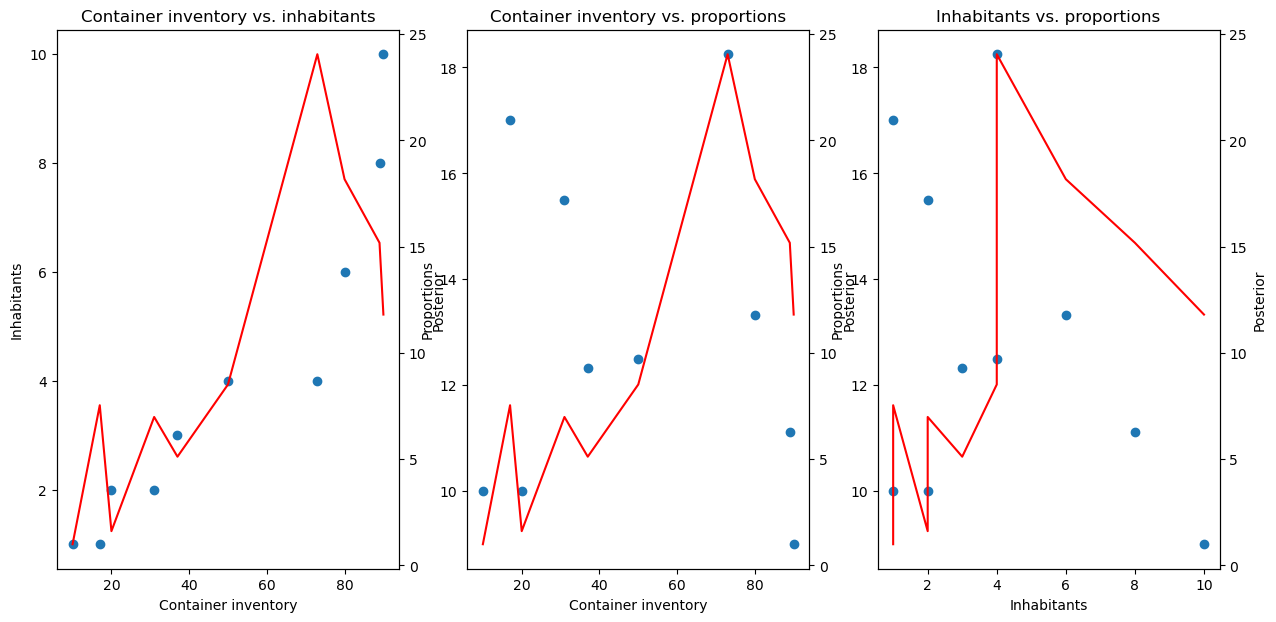

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

axes[0].scatter(containers, inhabitants)
axes[0].set_xlabel('Container inventory')
axes[0].set_ylabel('Inhabitants')
axes[0].set_title('Container inventory vs. inhabitants')
ax0 = axes[0].twinx()
ax0.plot(containers, posterior, 'r-')
ax0.set_ylabel('Posterior')

axes[1].scatter(containers, proportions)
axes[1].set_xlabel('Container inventory')
axes[1].set_ylabel('Proportions')
axes[1].set_title('Container inventory vs. proportions')
ax1 = axes[1].twinx()
ax1.plot(containers, posterior, 'r-')
ax1.set_ylabel('Posterior')

axes[2].scatter(inhabitants, proportions) # Is this figure even useful?
axes[2].set_xlabel('Inhabitants')
axes[2].set_ylabel('Proportions')
axes[2].set_title('Inhabitants vs. proportions')
ax2 = axes[2].twinx()
ax2.plot(inhabitants, posterior, 'r-')
ax2.set_ylabel('Posterior')

plt.show()

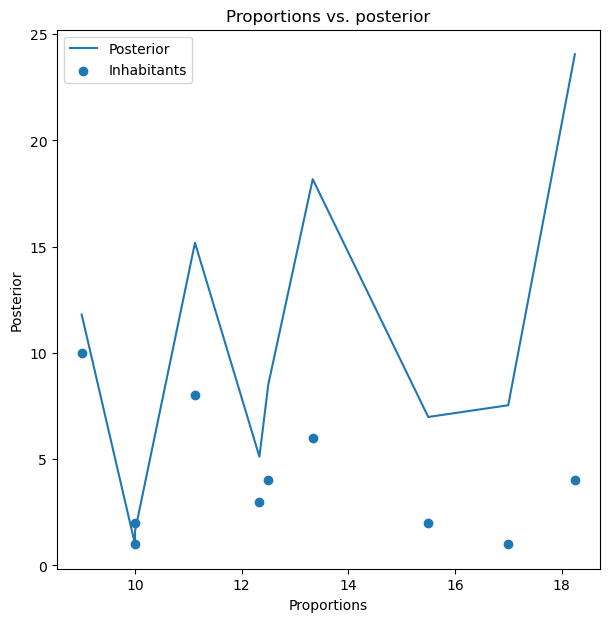

In [28]:
idx = np.argsort(proportions)

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(proportions[idx], posterior[idx], label='Posterior')
ax.scatter(proportions[idx], inhabitants[idx], label='Inhabitants')
ax.legend()
ax.set_xlabel('Proportions')
ax.set_ylabel('Posterior')
ax.set_title('Proportions vs. posterior')
plt.show()

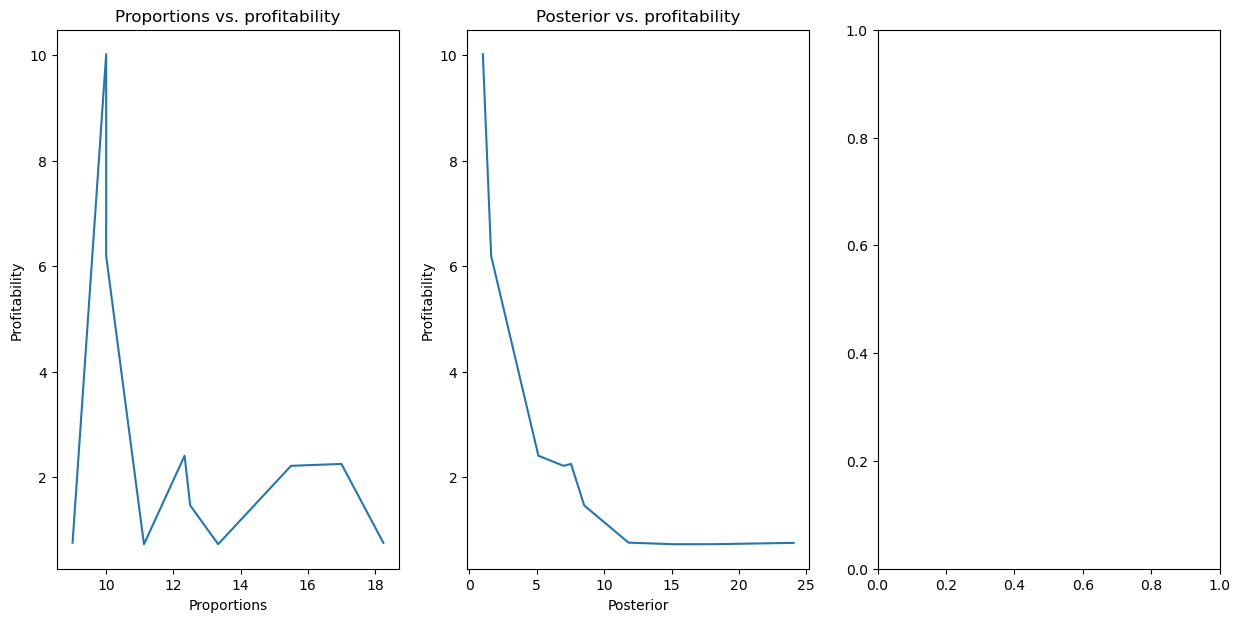

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
idx = np.argsort(proportions)
axes[0].plot(proportions[idx], profitability[idx])
axes[0].set_xlabel('Proportions')
axes[0].set_ylabel('Profitability')
axes[0].set_title('Proportions vs. profitability')

idx = np.argsort(posterior)
axes[1].plot(posterior[idx], profitability[idx])
axes[1].set_xlabel('Posterior')
axes[1].set_ylabel('Profitability')
axes[1].set_title('Posterior vs. profitability')
plt.show()

This is very revealing. This shows the most profitable containers were some of the smallest because very few players picked them. Unfortunately this probably won't work again as some people who have figured this out will pick this option. Meaning it isn't as profitable anymore. Useful to know for next year, if we end up doing this again. Lol.

I'm thinking of picking some boxes nearer the middle in value. In the hope this is robust against many people picking the more valuable boxes and people picking the high profitability but high risk boxes.

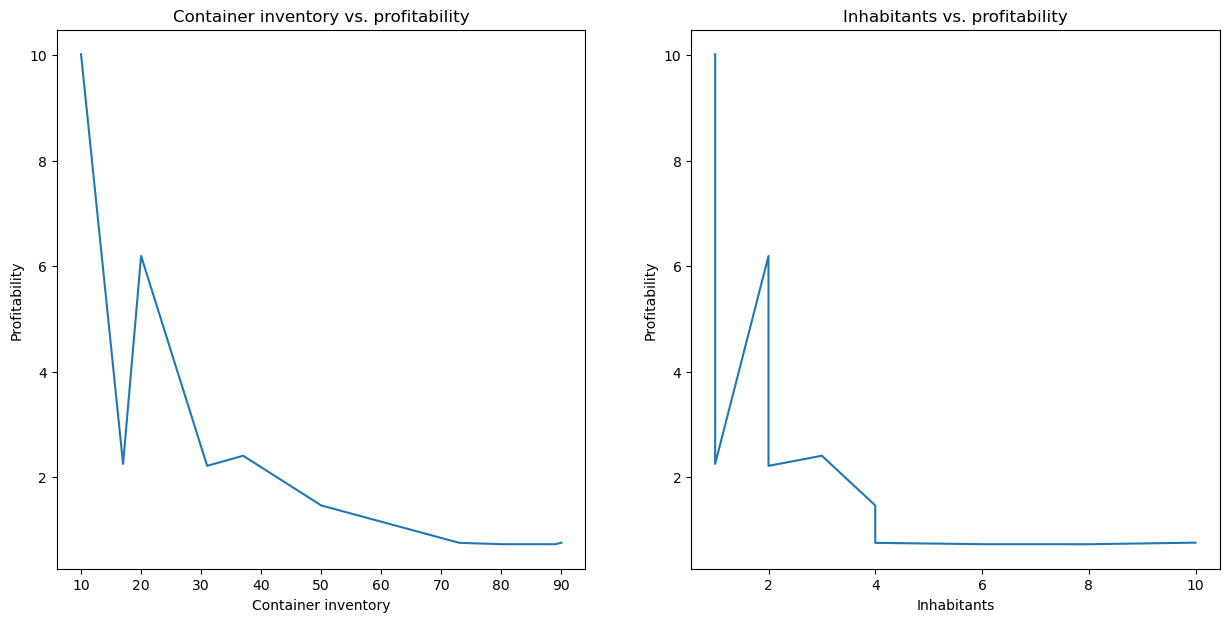

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

axes[0].plot(containers, profitability)
axes[0].set_xlabel('Container inventory')
axes[0].set_ylabel('Profitability')
axes[0].set_title('Container inventory vs. profitability')

axes[1].plot(inhabitants, profitability)
axes[1].set_xlabel('Inhabitants')
axes[1].set_ylabel('Profitability')
axes[1].set_title('Inhabitants vs. profitability')
plt.show()

# Round 4

I can't be bothered to do a full Bayesian analysis of the posterior data from round2. I'm not even sure how to correctly model this, it would take time. And the end of round 4 is in 2 hours. So instead I'm going to do some hand wavy justification for my choices in round 4.

In [31]:
posterior_r2 = posterior
inhabitants_r2 = inhabitants
proportions_r2 = proportions

In [32]:
cases = np.array([
    80, 50, 83, 31, 60,
    89, 10, 37, 70, 90,
    17, 40, 73, 100, 20,
    41, 79, 23, 47, 30,
])
inhabitants = np.array([
    6, 4, 7, 2, 4,
    8, 1, 3, 4, 10,
    1, 3, 4, 15, 2,
    3, 5, 2, 3, 2,
])


sort_index = np.argsort(cases)

cases = cases[sort_index]
inhabitants = inhabitants[sort_index]

proportions = cases / inhabitants
print(proportions)

[10.         17.         10.         11.5        15.         15.5
 12.33333333 13.33333333 13.66666667 15.66666667 12.5        15.
 17.5        18.25       15.8        13.33333333 11.85714286 11.125
  9.          6.66666667]


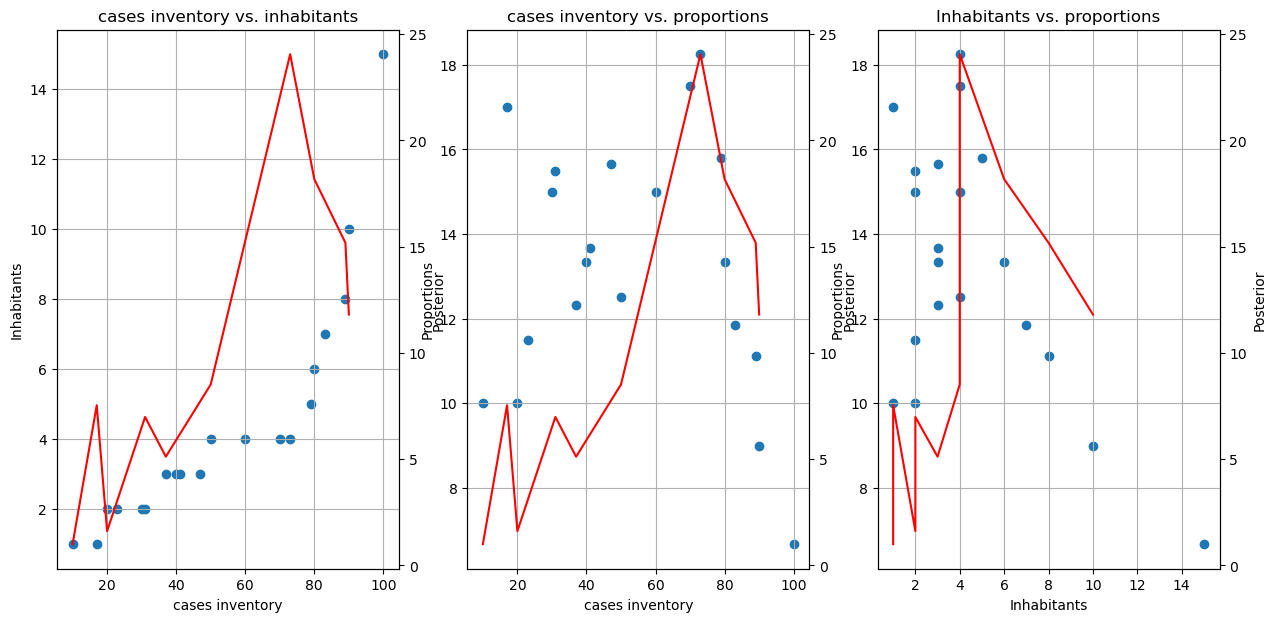

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

axes[0].scatter(cases, inhabitants)
axes[0].set_xlabel('cases inventory')
axes[0].set_ylabel('Inhabitants')
axes[0].set_title('cases inventory vs. inhabitants')
axes[0].grid()
ax0 = axes[0].twinx()
ax0.plot(containers, posterior_r2, 'r-')
ax0.set_ylabel('Posterior')

axes[1].scatter(cases, proportions)
axes[1].set_xlabel('cases inventory')
axes[1].set_ylabel('Proportions')
axes[1].set_title('cases inventory vs. proportions')
axes[1].grid()
ax1 = axes[1].twinx()
ax1.plot(containers, posterior_r2, 'r-')
ax1.set_ylabel('Posterior')

axes[2].scatter(inhabitants, proportions) # Is this figure even useful?
axes[2].set_xlabel('Inhabitants')
axes[2].set_ylabel('Proportions')
axes[2].set_title('Inhabitants vs. proportions')
axes[2].grid()
ax2 = axes[2].twinx()
ax2.plot(inhabitants_r2, posterior_r2, 'r-')
ax2.set_ylabel('Posterior')

plt.show()

I'm picking 47 and 70. I know 73 is better than 70, but I think more people will pick it making it less profitable in the end.
The 100k fee for picking a third case seems highly risky. I'm only confident in picking 2 cases with a 50k fee for the second.